In [49]:
# import os
# # os.chdir('..')
# import supervised 
# from supervised import *

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import pickle

In [89]:
# Read from extracted data
df = pd.read_csv('data_for_modeling_final_2022-10-28_1227.csv')

In [52]:
print(df.columns.tolist())

['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'dep_delay', 'crs_arr_time', 'arr_delay', 'cancelled', 'diverted', 'crs_elapsed_time', 'air_time', 'distance_x', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'day', 'month', 'year_x', 'crs_arr_hrs', 'crs_dep_hrs', 'day_of_year', 'week_of_year', 'crs_dep_time_hour', 'fl_date_year', 'fl_date_week_number', 'fl_date_t-1_week_week_number', 'fl_date_t-1_year_year', 'fl_date_t-1_year_month', 'mean_dep_delay_carrier_origin_month', 'mean_arr_delay_carrier_origin_month', 'mean_dep_delay_carrier_origin_week', 'mean_arr_delay_carrier_origin_week', 'mean_dep_delay_carrier_origin_date', 'mean_arr_delay_carrier_origin_date', 'mean_dep_delay_carrier_origin_date_t-1_week', 'mean_arr_delay_carrier_origin_date_t-1_week', 'mean_dep_delay_carrier_origin_date_t-1_week_week_number', 'mean_arr_delay_carrier_origin_date_t-1_week_week_number', 'mean_dep_delay_carrier_origin_datet-1_year_week', 'mean_

In [90]:
# Create list with the columns to be scaled.
numeric_cols = [

# 'dep_delay', 
'arr_delay', 'month', 'year_x', 'crs_elapsed_time', 'distance_x',
'mean_payload_per_departure', 'mean_seats_per_departure', 'mean_passengers_per_departure', 
'mean_freight_per_departure', 'mean_mail_per_departure', 'mean_empty_seats_per_departure',

'mean_dep_delay_carrier_origin_month', 'mean_arr_delay_carrier_origin_month', 
'mean_dep_delay_carrier_origin_week', 'mean_arr_delay_carrier_origin_week', 
'mean_dep_delay_carrier_origin_date', 'mean_arr_delay_carrier_origin_date', 
'mean_dep_delay_carrier_origin_date_t-1_week', 'mean_arr_delay_carrier_origin_date_t-1_week', 
'mean_dep_delay_carrier_origin_date_t-1_week_week_number', 
'mean_arr_delay_carrier_origin_date_t-1_week_week_number', 
'mean_dep_delay_carrier_origin_datet-1_year_week', 
'mean_arr_delay_carrier_origin_datet-1_year_week', 
'mean_dep_delay_carrier_origin_date_t-1_year_month', 
'mean_arr_delay_carrier_origin_date_t-1_year_month'
]


# Create a list with the dummy/categorical variables:
cat_cols = [

'origin_region_Midwest', 'origin_region_Northeast',
'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
'dest_region_Northeast', 'dest_region_South', 'dest_region_West',

'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
'arr_hrs_ctg_Night', 

'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening', 'dep_hrs_ctg_Morning', 
'dep_hrs_ctg_Night',

'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 
'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 
'day_of_week_Wednesday',

'haul_length_long', 'haul_length_medium', 'haul_length_short'

       ]

In [91]:
# 2022-10-27 8:57 Here is the function to scale the data. Please read the function documentation. 
# This function has been saved to the midterm_functions.py file.
def scale_data(df, numeric_cols, cat_cols):
    """
    - Perform standardization (StandardScaler) on the numeric_cols of the dataframe. 
    - combines both numeric and categorical back to the entire feature dataframe.

    Params:
    - df: Dataframe object with both feature and target data. 
    - numeric_cols: Name of the numeric columns to be scaled.
    - cat_cols: Name of the categorical columns (dummy variables) NOT to be scaled.

    Returns: Dataframe with numeric data scaled and categorical data as-is.

    """
    # Create the scaler based on the training dataset
    scaler = StandardScaler()
    scaler.fit(df[numeric_cols])
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = pd.DataFrame(np.hstack((X_categorical, X_numeric_scaled)), columns=cat_cols + numeric_cols)
    return X

In [92]:
# Call the function:
df_scaled = scale_data(df, numeric_cols, cat_cols)

In [93]:
X = df_scaled.drop('arr_delay', axis = 1)   # features
y = df_scaled['arr_delay']    # labels

In [94]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.metrics import mean_squared_error

# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

#### 1. Linear Regression (no regularization)

In [96]:
# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)

# Get R2 score
lin_reg.score(X_train_scaled, y_train)

0.03613728998781207

In [97]:
# lr_scores = -1 * cross_val_score(lin_reg, 
#                                  X_train_scaled, 
#                                  y_train, 
#                                  cv=cv, 
#                                  scoring='neg_root_mean_squared_error')

lr_scores = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error')
lr_scores

array([0.98375113, 0.98217246, 0.98345832, 0.98502087, 0.98262192,
       0.98065384, 0.97911128, 0.98217146, 0.98155974, 0.98007464])

In [98]:
lr_score_train = np.mean(lr_scores)
lr_score_train

0.9820595666976463

Predict

In [99]:
y_predicted = lin_reg.predict(X_test_scaled)
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

0.9805174320009802

#### 2. Lasso Regression (L1 regularization)

In [63]:
lasso_reg = LassoCV().fit(X_train_scaled, y_train)

In [64]:
# Get R2 score
lasso_reg.score(X_train_scaled, y_train)

0.03711277295009041

In [65]:
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train_scaled, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([0.98335901, 0.98178617, 0.98302477, 0.9845845 , 0.98222009,
       0.98017212, 0.97874069, 0.98170651, 0.98115836, 0.97959215])

In [66]:
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

0.9816344355454316

Predict

In [67]:
y_predicted = lasso_reg.predict(X_test_scaled)
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

0.9799927107080284

#### 3. Ridge Regression (L2 regularization)

In [68]:
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)

In [69]:
# Get R2 score
ridge_reg.score(X_train_scaled, y_train)

0.03711789416832223

In [70]:
ridge_scores = -1 * cross_val_score(ridge_reg, 
                                    X_train_scaled, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
ridge_scores

array([0.98335747, 0.98177973, 0.98302199, 0.98459634, 0.98221759,
       0.98017408, 0.97873126, 0.98169425, 0.98115467, 0.97959228])

In [71]:
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

0.9816319674369636

Predict

In [72]:
y_predicted = ridge_reg.predict(X_test_scaled)
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

0.9799947677162691

#### Principal Components Regression
Evaluate for different number of principal components

In [100]:
lin_reg = LinearRegression()
rmse_list = []

In [101]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(3327693, 37)

In [102]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([4.09292489e-01, 1.94941021e-01, 1.08144300e-01, 4.66529572e-02,
       3.29209294e-02, 2.54989834e-02, 2.32347100e-02, 1.73089060e-02,
       1.51059917e-02, 1.34228720e-02, 1.12153108e-02, 1.06374130e-02,
       1.05192370e-02, 1.04954508e-02, 1.03848374e-02, 1.02966425e-02,
       1.01881620e-02, 9.42299601e-03, 9.32798097e-03, 8.60085693e-03,
       6.83016581e-03, 3.10584942e-03, 1.33333422e-03, 5.89320899e-04,
       5.26935242e-04, 2.34683981e-06, 4.77666513e-26, 8.16857988e-27,
       5.76386411e-27, 3.63730382e-27, 1.91733748e-27, 8.27070415e-28,
       1.05743908e-29, 8.07187108e-32, 1.78043871e-33, 1.78043871e-33,
       1.78043871e-33])

In [103]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.011570,-0.024047,0.012195,-0.008567,0.023036,-0.077642,0.019808,0.009808,0.519376,-0.136399,...,0.066936,0.032582,0.048477,-0.012222,-0.004531,0.000001,0.000004,0.000000e+00,0.000000e+00,0.000000e+00
1,0.030937,0.020318,0.013602,-0.020317,-0.095807,-0.202743,0.053986,0.139156,0.135521,-0.000596,...,0.066936,0.032582,0.048477,-0.012222,-0.004531,0.000001,0.000004,4.496099e-19,5.146774e-18,-1.488044e-17
2,0.028583,-0.037581,-0.039074,-0.003669,-0.349808,0.493908,-0.104441,-0.402217,-0.410038,0.130413,...,0.066936,0.032582,0.048477,-0.012222,-0.004531,0.000001,0.000004,-7.626639e-19,2.320882e-18,-6.792367e-18
3,-0.071091,0.041309,0.013277,0.032553,0.422579,-0.213523,0.030648,0.253252,-0.244859,0.006583,...,0.066936,0.032582,0.048477,-0.012222,-0.004531,0.000001,0.000004,4.128028e-19,2.422047e-17,-1.085282e-17
4,0.005115,-0.029131,0.004270,0.003103,-0.019224,-0.089428,0.040979,-0.377703,0.392173,-0.095420,...,0.485840,0.085306,-0.043629,-0.012809,-0.003942,-0.000050,0.000060,-1.574800e-17,-4.561118e-17,1.571259e-17


In [104]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [78]:
rmse_list

[0.9981276729811744,
 0.9980876536731677,
 0.9977322649263289,
 0.9972877079925127,
 0.9967519769165565,
 0.9967522247120959,
 0.9953861372148044,
 0.995361886947836,
 0.9866495787323359,
 0.9866476627976889,
 0.9865779304397064,
 0.98657229973036,
 0.9862482248586014,
 0.9862484133758762,
 0.9861415798707462,
 0.9861327720371899,
 0.986045525111096,
 0.9860457531798421,
 0.9856425150166024,
 0.9856350843132102,
 0.9856332350266213,
 0.9856167937781125,
 0.9854226956911105,
 0.9849963741352816,
 0.9849878658957382,
 0.9843137975041503,
 0.984161102575705,
 0.9841614185044675,
 0.9819681218936147,
 0.9816319675580397,
 0.9816318792749061,
 0.9816320749884111,
 0.981632451311415,
 0.9816328360915122,
 0.9816334322606286,
 0.9816335981630366,
 0.9816331364981614,
 0.981633950995708,
 0.9816366680820738,
 0.9816359784937134,
 0.9816341696618662,
 0.9816374076840748,
 0.9816373680936896,
 0.9816373805860696,
 0.9816372631998265,
 0.9816372293520053,
 0.9816371913352387,
 0.9816372052576886,

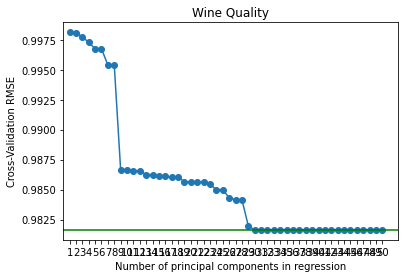

In [79]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Wine Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

We see that the training set performance of PCR improves (i.e., RMSE decreases) with more principal components, in line with what we expect.

The green line is the RMSE benchmark from the baseline standard linear regression model using all original features.

The plot shows that the lowest cross-validation RMSE (minimum point in the plot) occurs when there are M=10 or 30 principal components. The RMSE at M=10 is, in fact, slightly below the green line.

In [80]:
# Visually determine optimal number of principal components
# best_pc_num = 10
best_pc_num = 30

Predict

In [81]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [82]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.03711789485735395

In [83]:
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()
pcr_score_train

0.9816319675580397

In [84]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(831924, 30)

In [85]:
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

0.9799948249195086

### Evaluation

In [86]:
train_metrics = np.array([round(lr_score_train,3), 
                          round(lasso_score_train,3), 
                          round(ridge_score_train,3), 
                          round(pcr_score_train,3)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 
                       'Lasso Regression', 
                       'Ridge Regression', 
                       f'PCR ({best_pc_num} components)']
train_metrics

,RMSE (Train Set)
Linear Regression,0.982
Lasso Regression,0.982
Ridge Regression,0.982
PCR (30 components),0.982


In [87]:
test_metrics = np.array([round(lr_score_test,3), 
                         round(lasso_score_test,3), 
                         round(ridge_score_test,3), 
                         round(pcr_score_test,3)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 
                      'Lasso Regression', 
                      'Ridge Regression', 
                      f'PCR ({best_pc_num} components)']
test_metrics

,RMSE (Test Set)
Linear Regression,0.98
Lasso Regression,0.98
Ridge Regression,0.98
PCR (30 components),0.98


#### Overwiew

Liner Regression with features:

Test data	

- RMSE: 		0.92	
- MAE: 		0.65
- R^2: 		0.14


Training data

- RMSE: 		0.85
- MAE: 		0.65
- R^2: 		0.14


Difference

- RMSE: 		0.07
- MAE: 		-0.00
- R^2: 		-0.00


Best model parameters from randomized search: {'normalize': True}